<a href="https://colab.research.google.com/github/bmurmann/Book-on-MOS-stages/blob/main/ngspice/Figure_2_7_CS_DC_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DC sweep of common-source amplifier 

Tool setup adopted from @proppy (see this [Colab notebook](https://colab.research.google.com/gist/proppy/a0c5ed3e28e942f1621200dcf67bad5a/sky130-pyspice-playground.ipynb#scrollTo=q0XHBAt1jGmQ))


## Tool setup

In [ ]:
#@title Bootstrap conda environment {display-mode: "form"}
#@markdown - Click the ▷ button to initialize the conda-eda environment.
#@markdown - Wait for the installation to complete
#@markdown - Click the `Restart Kernel` button.
%pip install -q https://github.com/conda-incubator/condacolab/archive/28521d7c5c494dd6377bb072d97592e30c44609c.tar.gz
import condacolab

condacolab.install(restart_kernel=False)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
✨🍰✨ Everything looks OK!


### Install dependencies

- Wait for the kernel restart to complete.
- Click the ▷ button below to run the hidden cells to complete the setup.


In [ ]:
!mamba install -c conda-forge ngspice


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['ngspice']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-for

### Define netlist and init file

In [ ]:
%%writefile netlist.spice
* Common-source amplifier

v1 vdd 0 5
v2 vi 0  1
m1 vo vi 0 0 my_nmos w=20u l=1u
rd vdd vo 5k

.model my_nmos nmos level=1 vto=0.5 50u
.option brief
.op
.end

.control
save all
dc v2 0 5 0.01
display
wrdata output.txt v(vo)
.endc


Overwriting netlist.spice


In [ ]:
%%writefile .spiceinit
set ngbehavior=hsa
set ng_nomodcheck

Overwriting .spiceinit


### Run simulation

In [ ]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs a


Circuit: * common-source amplifier

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 501
Here are the vectors currently active:

Title: * common-source amplifier
Name: dc1 (DC transfer characteristic)
Date: Sun Dec 25 00:33:17  2022

    v-sweep             : voltage, real, 501 long [default scale]
    v1#branch           : current, real, 501 long
    v2#branch           : current, real, 501 long
    vdd                 : voltage, real, 501 long
    vi                  : voltage, real, 501 long
    vo                  : voltage, real, 501 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vo                               4.750000e+00
	vi                               1.000000e+00
	vdd                              5.000000e+00

	Source	Current
	------	-------

	v1#branch      

## Plot results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vi", "vo"]
df

,vi,vo
0,0.00,5.000000
1,0.01,5.000000
2,0.02,5.000000
3,0.03,5.000000
4,0.04,5.000000
...,...,...
496,4.96,0.532631
497,4.97,0.531430
498,4.98,0.530236
499,4.99,0.529047


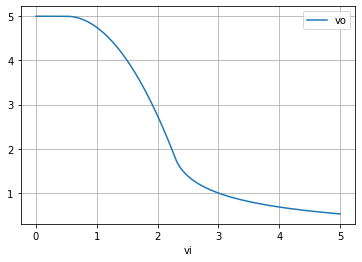

In [ ]:
df.plot(x="vi", y="vo", grid=True)
plt.show()